In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000
print("seed",seed)
print("cfg_env",cfg_env)

seed 3
cfg_env cartpole


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


4 1 2


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:268: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


In [3]:
# from sac import SAC
# agent = SAC(env.observation_space.shape[0], env.action_space)
# agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

In [4]:
# データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)
# c_array = debug_info[:,1]

# episode_index = 9
# plt.plot(offline_data[episode_index][:,0],offline_data[episode_index][:,1])
# print("env_param: ",debug_info[episode_index])

offline_data[1].sum() tensor(2138.1060)
(100, 2)


In [6]:
# import importlib
# importlib.reload(vi_base)
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":None,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
    }

vi = vi_base.baseVI(args_init_dict)
# print(np.random.randn())

dec: h_dim 64


In [7]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()


train_vae: enc_dec
train: iter 0  trainloss 28264.93153  validloss 304575.92111±0.00000  bestvalidloss 304575.92111  last_update 0
train: iter 1  trainloss 3278.07044  validloss 42395.40266±0.00000  bestvalidloss 42395.40266  last_update 0
train: iter 2  trainloss 1263.70313  validloss 29539.54360±0.00000  bestvalidloss 29539.54360  last_update 0
train: iter 3  trainloss 1104.03384  validloss 3969.45456±0.00000  bestvalidloss 3969.45456  last_update 0
train: iter 4  trainloss 933.74903  validloss 2157.14777±0.00000  bestvalidloss 2157.14777  last_update 0
train: iter 5  trainloss 814.43292  validloss 1708.20273±0.00000  bestvalidloss 1708.20273  last_update 0
train: iter 6  trainloss 773.75078  validloss 1496.20672±0.00000  bestvalidloss 1496.20672  last_update 0
train: iter 7  trainloss 687.23287  validloss 1069.27965±0.00000  bestvalidloss 1069.27965  last_update 0
train: iter 8  trainloss 636.43444  validloss 964.16371±0.00000  bestvalidloss 964.16371  last_update 0
train: iter 9  t

train: iter 77  trainloss -712.68491  validloss -555.74461±0.00000  bestvalidloss -715.24274  last_update 4
train: iter 78  trainloss -718.15292  validloss -718.77838±0.00000  bestvalidloss -718.77838  last_update 0
train: iter 79  trainloss -683.62979  validloss -679.68870±0.00000  bestvalidloss -718.77838  last_update 1
train: iter 80  trainloss -641.78623  validloss -573.25523±0.00000  bestvalidloss -718.77838  last_update 2
train: iter 81  trainloss -690.79408  validloss -713.00733±0.00000  bestvalidloss -718.77838  last_update 3
train: iter 82  trainloss -704.00047  validloss -608.40840±0.00000  bestvalidloss -718.77838  last_update 4
train: iter 83  trainloss -753.31485  validloss -739.72317±0.00000  bestvalidloss -739.72317  last_update 0
train: iter 84  trainloss -633.17293  validloss -744.40859±0.00000  bestvalidloss -744.40859  last_update 0
train: iter 85  trainloss -620.81551  validloss -505.20569±0.00000  bestvalidloss -744.40859  last_update 1
train: iter 86  trainloss -6

train: iter 153  trainloss -1066.73996  validloss -1138.48385±0.00000  bestvalidloss -1138.48385  last_update 0
train: iter 154  trainloss -1021.06269  validloss -1049.15496±0.00000  bestvalidloss -1138.48385  last_update 1
train: iter 155  trainloss -947.44027  validloss -674.22585±0.00000  bestvalidloss -1138.48385  last_update 2
train: iter 156  trainloss -1086.54653  validloss -1086.40996±0.00000  bestvalidloss -1138.48385  last_update 3
train: iter 157  trainloss -1091.05707  validloss -1059.92829±0.00000  bestvalidloss -1138.48385  last_update 4
train: iter 158  trainloss -992.67836  validloss -1068.95004±0.00000  bestvalidloss -1138.48385  last_update 5
train: iter 159  trainloss -1094.59624  validloss -1180.31105±0.00000  bestvalidloss -1180.31105  last_update 0
train: iter 160  trainloss -922.04332  validloss -1098.69142±0.00000  bestvalidloss -1180.31105  last_update 1
train: iter 161  trainloss -910.62703  validloss -725.85534±0.00000  bestvalidloss -1180.31105  last_update 

train: iter 227  trainloss -1218.97411  validloss -1265.08099±0.00000  bestvalidloss -1307.99209  last_update 7
train: iter 228  trainloss -1285.59198  validloss -1180.84347±0.00000  bestvalidloss -1307.99209  last_update 8
train: iter 229  trainloss -1200.47626  validloss -1168.23683±0.00000  bestvalidloss -1307.99209  last_update 9
train: iter 230  trainloss -1170.18447  validloss -1083.64268±0.00000  bestvalidloss -1307.99209  last_update 10
train: iter 231  trainloss -1203.19523  validloss -1212.72442±0.00000  bestvalidloss -1307.99209  last_update 11
train: iter 232  trainloss -1167.38683  validloss -1224.22125±0.00000  bestvalidloss -1307.99209  last_update 12
train: iter 233  trainloss -1223.82049  validloss -1092.87655±0.00000  bestvalidloss -1307.99209  last_update 13
train: iter 234  trainloss -1303.59648  validloss -1273.18269±0.00000  bestvalidloss -1307.99209  last_update 14
train: iter 235  trainloss -1130.03645  validloss -1163.62298±0.00000  bestvalidloss -1307.99209  l

train: iter 301  trainloss -1362.54286  validloss -1412.08897±0.00000  bestvalidloss -1412.08897  last_update 0
train: iter 302  trainloss -1436.64196  validloss -1360.77511±0.00000  bestvalidloss -1412.08897  last_update 1
train: iter 303  trainloss -1241.57979  validloss -1401.74295±0.00000  bestvalidloss -1412.08897  last_update 2
train: iter 304  trainloss -1363.91051  validloss -1341.19203±0.00000  bestvalidloss -1412.08897  last_update 3
train: iter 305  trainloss -1409.10383  validloss -1347.87432±0.00000  bestvalidloss -1412.08897  last_update 4
train: iter 306  trainloss -1359.63058  validloss -1393.62937±0.00000  bestvalidloss -1412.08897  last_update 5
train: iter 307  trainloss -1211.31803  validloss -1088.03430±0.00000  bestvalidloss -1412.08897  last_update 6
train: iter 308  trainloss -1420.05215  validloss -1386.56769±0.00000  bestvalidloss -1412.08897  last_update 7
train: iter 309  trainloss -1386.20473  validloss -1377.36114±0.00000  bestvalidloss -1412.08897  last_u

train: iter 374  trainloss -1380.76761  validloss -1465.84016±0.00000  bestvalidloss -1495.01327  last_update 4
train: iter 375  trainloss -1463.25567  validloss -1437.09384±0.00000  bestvalidloss -1495.01327  last_update 5
train: iter 376  trainloss -1458.09192  validloss -1484.65135±0.00000  bestvalidloss -1495.01327  last_update 6
train: iter 377  trainloss -1393.09930  validloss -1400.56110±0.00000  bestvalidloss -1495.01327  last_update 7
train: iter 378  trainloss -1516.98814  validloss -1478.53345±0.00000  bestvalidloss -1495.01327  last_update 8
train: iter 379  trainloss -1348.89451  validloss -1445.26235±0.00000  bestvalidloss -1495.01327  last_update 9
train: iter 380  trainloss -1268.24179  validloss -1352.61765±0.00000  bestvalidloss -1495.01327  last_update 10
train: iter 381  trainloss -1458.08248  validloss -1289.77469±0.00000  bestvalidloss -1495.01327  last_update 11
train: iter 382  trainloss -1470.03252  validloss -1473.99331±0.00000  bestvalidloss -1495.01327  last

train: iter 447  trainloss -1507.98395  validloss -1468.87494±0.00000  bestvalidloss -1529.05458  last_update 16
train: iter 448  trainloss -1534.98240  validloss -1464.01059±0.00000  bestvalidloss -1529.05458  last_update 17
train: iter 449  trainloss -1519.55887  validloss -1540.09329±0.00000  bestvalidloss -1540.09329  last_update 0
train: iter 450  trainloss -1415.89194  validloss -1462.33901±0.00000  bestvalidloss -1540.09329  last_update 1
train: iter 451  trainloss -1471.65562  validloss -1259.90891±0.00000  bestvalidloss -1540.09329  last_update 2
train: iter 452  trainloss -1318.16663  validloss -1514.10396±0.00000  bestvalidloss -1540.09329  last_update 3
train: iter 453  trainloss -1458.91072  validloss -1130.57901±0.00000  bestvalidloss -1540.09329  last_update 4
train: iter 454  trainloss -1559.37027  validloss -1456.84762±0.00000  bestvalidloss -1540.09329  last_update 5
train: iter 455  trainloss -1582.24564  validloss -1560.44355±0.00000  bestvalidloss -1560.44355  last

train: iter 520  trainloss -1597.70132  validloss -1539.55243±0.00000  bestvalidloss -1570.69505  last_update 2
train: iter 521  trainloss -1562.24591  validloss -1589.96924±0.00000  bestvalidloss -1589.96924  last_update 0
train: iter 522  trainloss -1372.69984  validloss -1337.28764±0.00000  bestvalidloss -1589.96924  last_update 1
train: iter 523  trainloss -1532.31296  validloss -1291.31982±0.00000  bestvalidloss -1589.96924  last_update 2
train: iter 524  trainloss -1452.82214  validloss -1417.93068±0.00000  bestvalidloss -1589.96924  last_update 3
train: iter 525  trainloss -1572.26221  validloss -1507.94855±0.00000  bestvalidloss -1589.96924  last_update 4
train: iter 526  trainloss -1592.78514  validloss -1531.49764±0.00000  bestvalidloss -1589.96924  last_update 5
train: iter 527  trainloss -1403.69849  validloss -1549.97500±0.00000  bestvalidloss -1589.96924  last_update 6
train: iter 528  trainloss -1436.68476  validloss -1345.74445±0.00000  bestvalidloss -1589.96924  last_u

train: iter 593  trainloss -1525.77433  validloss -1576.59041±0.00000  bestvalidloss -1593.50001  last_update 10
train: iter 594  trainloss -1573.66131  validloss -1489.57971±0.00000  bestvalidloss -1593.50001  last_update 11
train: iter 595  trainloss -1564.94655  validloss -1393.67944±0.00000  bestvalidloss -1593.50001  last_update 12
train: iter 596  trainloss -1564.89907  validloss -1514.77643±0.00000  bestvalidloss -1593.50001  last_update 13
train: iter 597  trainloss -1626.99209  validloss -1567.40285±0.00000  bestvalidloss -1593.50001  last_update 14
train: iter 598  trainloss -1641.25254  validloss -1602.77770±0.00000  bestvalidloss -1602.77770  last_update 0
train: iter 599  trainloss -1319.15478  validloss -1582.88761±0.00000  bestvalidloss -1602.77770  last_update 1
train: iter 600  trainloss -1577.77648  validloss -1439.28248±0.00000  bestvalidloss -1602.77770  last_update 2
train: iter 601  trainloss -1562.75137  validloss -1527.19538±0.00000  bestvalidloss -1602.77770  l

train: iter 666  trainloss -1507.71232  validloss -1568.71831±0.00000  bestvalidloss -1629.79620  last_update 8
train: iter 667  trainloss -1509.06441  validloss -1273.49209±0.00000  bestvalidloss -1629.79620  last_update 9
train: iter 668  trainloss -1529.44726  validloss -1558.99088±0.00000  bestvalidloss -1629.79620  last_update 10
train: iter 669  trainloss -1586.64561  validloss -1551.56037±0.00000  bestvalidloss -1629.79620  last_update 11
train: iter 670  trainloss -1632.46176  validloss -1554.78605±0.00000  bestvalidloss -1629.79620  last_update 12
train: iter 671  trainloss -1597.42592  validloss -1541.39581±0.00000  bestvalidloss -1629.79620  last_update 13
train: iter 672  trainloss -1444.02466  validloss -1511.46375±0.00000  bestvalidloss -1629.79620  last_update 14
train: iter 673  trainloss -1488.71260  validloss -1580.28765±0.00000  bestvalidloss -1629.79620  last_update 15
train: iter 674  trainloss -1546.38012  validloss -1343.94627±0.00000  bestvalidloss -1629.79620  

train: iter 739  trainloss -1606.31408  validloss -1593.90463±0.00000  bestvalidloss -1632.79346  last_update 38
train: iter 740  trainloss -1463.24214  validloss -1524.21577±0.00000  bestvalidloss -1632.79346  last_update 39
train: iter 741  trainloss -1584.91086  validloss -1545.99934±0.00000  bestvalidloss -1632.79346  last_update 40
train: iter 742  trainloss -1641.77583  validloss -1575.13925±0.00000  bestvalidloss -1632.79346  last_update 41
train: iter 743  trainloss -1620.34484  validloss -1635.01693±0.00000  bestvalidloss -1635.01693  last_update 0
train: iter 744  trainloss -1657.03780  validloss -1575.38675±0.00000  bestvalidloss -1635.01693  last_update 1
train: iter 745  trainloss -1596.42444  validloss -1585.16323±0.00000  bestvalidloss -1635.01693  last_update 2
train: iter 746  trainloss -1582.90065  validloss -1561.86738±0.00000  bestvalidloss -1635.01693  last_update 3
train: iter 747  trainloss -1615.38737  validloss -1590.49600±0.00000  bestvalidloss -1635.01693  la

train: iter 812  trainloss -1668.78920  validloss -1616.41202±0.00000  bestvalidloss -1647.60569  last_update 11
train: iter 813  trainloss -1506.86494  validloss -1632.62572±0.00000  bestvalidloss -1647.60569  last_update 12
train: iter 814  trainloss -1617.42538  validloss -1536.21374±0.00000  bestvalidloss -1647.60569  last_update 13
train: iter 815  trainloss -1622.30918  validloss -1619.35480±0.00000  bestvalidloss -1647.60569  last_update 14
train: iter 816  trainloss -1548.30416  validloss -1532.56549±0.00000  bestvalidloss -1647.60569  last_update 15
train: iter 817  trainloss -1671.31460  validloss -1576.18058±0.00000  bestvalidloss -1647.60569  last_update 16
train: iter 818  trainloss -1661.61674  validloss -1603.14105±0.00000  bestvalidloss -1647.60569  last_update 17
train: iter 819  trainloss -1637.47738  validloss -1461.52593±0.00000  bestvalidloss -1647.60569  last_update 18
train: iter 820  trainloss -1641.50665  validloss -1546.13337±0.00000  bestvalidloss -1647.60569

train: iter 885  trainloss -1557.24479  validloss -1346.71672±0.00000  bestvalidloss -1675.80087  last_update 16
train: iter 886  trainloss -1638.96024  validloss -1572.91118±0.00000  bestvalidloss -1675.80087  last_update 17
train: iter 887  trainloss -1640.69902  validloss -1484.00735±0.00000  bestvalidloss -1675.80087  last_update 18
train: iter 888  trainloss -1694.36810  validloss -1625.65496±0.00000  bestvalidloss -1675.80087  last_update 19
train: iter 889  trainloss -1442.17764  validloss -1663.72381±0.00000  bestvalidloss -1675.80087  last_update 20
train: iter 890  trainloss -1629.45945  validloss -1582.48259±0.00000  bestvalidloss -1675.80087  last_update 21
train: iter 891  trainloss -1666.62004  validloss -1588.61983±0.00000  bestvalidloss -1675.80087  last_update 22
train: iter 892  trainloss -1694.33258  validloss -1569.52179±0.00000  bestvalidloss -1675.80087  last_update 23
train: iter 893  trainloss -1683.20215  validloss -1629.19364±0.00000  bestvalidloss -1675.80087

train: iter 958  trainloss -1657.44099  validloss -1595.95809±0.00000  bestvalidloss -1697.92124  last_update 34
train: iter 959  trainloss -1684.26705  validloss -1579.70039±0.00000  bestvalidloss -1697.92124  last_update 35
train: iter 960  trainloss -1599.29137  validloss -1514.89283±0.00000  bestvalidloss -1697.92124  last_update 36
train: iter 961  trainloss -1679.09858  validloss -1454.46530±0.00000  bestvalidloss -1697.92124  last_update 37
train: iter 962  trainloss -1637.30910  validloss -1573.94508±0.00000  bestvalidloss -1697.92124  last_update 38
train: iter 963  trainloss -1667.29314  validloss -1640.81288±0.00000  bestvalidloss -1697.92124  last_update 39
train: iter 964  trainloss -1468.29065  validloss -1437.10544±0.00000  bestvalidloss -1697.92124  last_update 40
train: iter 965  trainloss -1688.60766  validloss -1572.02387±0.00000  bestvalidloss -1697.92124  last_update 41
train: iter 966  trainloss -1682.45873  validloss -1592.90982±0.00000  bestvalidloss -1697.92124

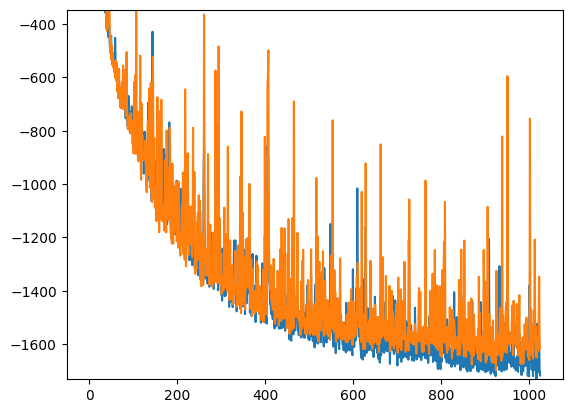

In [8]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
plt.ylim([min(min(train_curve1),min(valid_curve1) ), 
          max(max(train_curve1[50:]),max(valid_curve1[50:])) ])
# plt.xlim([50, len(train_curve1)])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [9]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 7.33988  validloss 7.74052±0.00000  bestvalidloss 7.74052  last_update 0
train: iter 1  trainloss 6.72926  validloss 7.03945±0.00000  bestvalidloss 7.03945  last_update 0
train: iter 2  trainloss 6.19306  validloss 6.45527±0.00000  bestvalidloss 6.45527  last_update 0
train: iter 3  trainloss 5.74963  validloss 5.95835±0.00000  bestvalidloss 5.95835  last_update 0
train: iter 4  trainloss 5.36432  validloss 5.55882±0.00000  bestvalidloss 5.55882  last_update 0
train: iter 5  trainloss 5.03012  validloss 5.19665±0.00000  bestvalidloss 5.19665  last_update 0
train: iter 6  trainloss 4.73421  validloss 4.88042±0.00000  bestvalidloss 4.88042  last_update 0
train: iter 7  trainloss 4.47961  validloss 4.61957±0.00000  bestvalidloss 4.61957  last_update 0
train: iter 8  trainloss 4.26161  validloss 4.36912±0.00000  bestvalidloss 4.36912  last_update 0
train: iter 9  trainloss 4.06104  validloss 4.14619±0.00000  bestvalidloss 4.14619  last_update 0
train: iter 10  trai

train: iter 85  trainloss 0.34678  validloss 0.27575±0.00000  bestvalidloss 0.27575  last_update 0
train: iter 86  trainloss 0.30557  validloss 0.23084±0.00000  bestvalidloss 0.23084  last_update 0
train: iter 87  trainloss 0.28504  validloss 0.20065±0.00000  bestvalidloss 0.20065  last_update 0
train: iter 88  trainloss 0.22329  validloss 0.14411±0.00000  bestvalidloss 0.14411  last_update 0
train: iter 89  trainloss 0.19655  validloss 0.13749±0.00000  bestvalidloss 0.13749  last_update 0
train: iter 90  trainloss 0.14845  validloss 0.09402±0.00000  bestvalidloss 0.09402  last_update 0
train: iter 91  trainloss 0.12132  validloss 0.05133±0.00000  bestvalidloss 0.05133  last_update 0
train: iter 92  trainloss 0.09824  validloss 0.01550±0.00000  bestvalidloss 0.01550  last_update 0
train: iter 93  trainloss 0.06512  validloss -0.04931±0.00000  bestvalidloss -0.04931  last_update 0
train: iter 94  trainloss 0.02791  validloss -0.07426±0.00000  bestvalidloss -0.07426  last_update 0
train:

train: iter 165  trainloss -0.51770  validloss -0.81258±0.00000  bestvalidloss -0.83611  last_update 1
train: iter 166  trainloss -0.51840  validloss -0.82811±0.00000  bestvalidloss -0.83611  last_update 2
train: iter 167  trainloss -0.46826  validloss -0.82155±0.00000  bestvalidloss -0.83611  last_update 3
train: iter 168  trainloss -0.51661  validloss -0.80622±0.00000  bestvalidloss -0.83611  last_update 4
train: iter 169  trainloss -0.46828  validloss -0.83151±0.00000  bestvalidloss -0.83611  last_update 5
train: iter 170  trainloss -0.49812  validloss -0.78714±0.00000  bestvalidloss -0.83611  last_update 6
train: iter 171  trainloss -0.53094  validloss -0.79759±0.00000  bestvalidloss -0.83611  last_update 7
train: iter 172  trainloss -0.51574  validloss -0.80649±0.00000  bestvalidloss -0.83611  last_update 8
train: iter 173  trainloss -0.56745  validloss -0.84318±0.00000  bestvalidloss -0.84318  last_update 0
train: iter 174  trainloss -0.53636  validloss -0.76709±0.00000  bestvali

train: iter 248  trainloss -0.52363  validloss -0.82779±0.00000  bestvalidloss -0.90075  last_update 65
train: iter 249  trainloss -0.51569  validloss -0.79246±0.00000  bestvalidloss -0.90075  last_update 66
train: iter 250  trainloss -0.53706  validloss -0.78547±0.00000  bestvalidloss -0.90075  last_update 67
train: iter 251  trainloss -0.52605  validloss -0.76089±0.00000  bestvalidloss -0.90075  last_update 68
train: iter 252  trainloss -0.54992  validloss -0.83960±0.00000  bestvalidloss -0.90075  last_update 69
train: iter 253  trainloss -0.51475  validloss -0.78767±0.00000  bestvalidloss -0.90075  last_update 70
train: iter 254  trainloss -0.56621  validloss -0.76924±0.00000  bestvalidloss -0.90075  last_update 71
train: iter 255  trainloss -0.53239  validloss -0.82978±0.00000  bestvalidloss -0.90075  last_update 72
train: iter 256  trainloss -0.53381  validloss -0.83751±0.00000  bestvalidloss -0.90075  last_update 73
train: iter 257  trainloss -0.55966  validloss -0.80710±0.00000 

In [10]:
print(vi.initial_belief)

Parameter containing:
tensor([-3.3984, -0.0369, -4.6606, -2.0509], requires_grad=True)


In [11]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 73.26220  validloss 79.78729±0.00000  bestvalidloss 79.78729  last_update 0
train: iter 1  trainloss 52.55297  validloss 61.33328±0.00000  bestvalidloss 61.33328  last_update 0
train: iter 2  trainloss 37.12792  validloss 41.96709±0.00000  bestvalidloss 41.96709  last_update 0
train: iter 3  trainloss 27.35730  validloss 31.19867±0.00000  bestvalidloss 31.19867  last_update 0
train: iter 4  trainloss 20.76290  validloss 23.31572±0.00000  bestvalidloss 23.31572  last_update 0
train: iter 5  trainloss 16.42229  validloss 18.60270±0.00000  bestvalidloss 18.60270  last_update 0
train: iter 6  trainloss 13.44568  validloss 15.20841±0.00000  bestvalidloss 15.20841  last_update 0
train: iter 7  trainloss 11.32023  validloss 12.88715±0.00000  bestvalidloss 12.88715  last_update 0
train: iter 8  trainloss 9.74235  validloss 11.34522±0.00000  bestvalidloss 11.34522  last_update 0
train: iter 9  trainloss 8.61924  validloss 10.11495±0.00000  bestvalidloss 10.11495  last_u

train: iter 84  trainloss 3.39803  validloss 4.65146±0.00000  bestvalidloss 4.58095  last_update 9
train: iter 85  trainloss 3.43234  validloss 4.65250±0.00000  bestvalidloss 4.58095  last_update 10
train: iter 86  trainloss 3.38379  validloss 4.79820±0.00000  bestvalidloss 4.58095  last_update 11
train: iter 87  trainloss 3.40013  validloss 4.57023±0.00000  bestvalidloss 4.57023  last_update 0
train: iter 88  trainloss 3.37583  validloss 4.72169±0.00000  bestvalidloss 4.57023  last_update 1
train: iter 89  trainloss 3.38384  validloss 4.64047±0.00000  bestvalidloss 4.57023  last_update 2
train: iter 90  trainloss 3.37259  validloss 4.64689±0.00000  bestvalidloss 4.57023  last_update 3
train: iter 91  trainloss 3.39043  validloss 4.69438±0.00000  bestvalidloss 4.57023  last_update 4
train: iter 92  trainloss 3.40605  validloss 4.69675±0.00000  bestvalidloss 4.57023  last_update 5
train: iter 93  trainloss 3.34281  validloss 4.62382±0.00000  bestvalidloss 4.57023  last_update 6
train: i

train: iter 167  trainloss 3.26072  validloss 4.59159±0.00000  bestvalidloss 4.35577  last_update 15
train: iter 168  trainloss 3.27972  validloss 4.49327±0.00000  bestvalidloss 4.35577  last_update 16
train: iter 169  trainloss 3.30238  validloss 4.53673±0.00000  bestvalidloss 4.35577  last_update 17
train: iter 170  trainloss 3.24361  validloss 4.62573±0.00000  bestvalidloss 4.35577  last_update 18
train: iter 171  trainloss 3.28484  validloss 4.56770±0.00000  bestvalidloss 4.35577  last_update 19
train: iter 172  trainloss 3.30582  validloss 4.39590±0.00000  bestvalidloss 4.35577  last_update 20
train: iter 173  trainloss 3.26224  validloss 4.53599±0.00000  bestvalidloss 4.35577  last_update 21
train: iter 174  trainloss 3.33014  validloss 4.51401±0.00000  bestvalidloss 4.35577  last_update 22
train: iter 175  trainloss 3.30506  validloss 4.60776±0.00000  bestvalidloss 4.35577  last_update 23
train: iter 176  trainloss 3.29952  validloss 4.44877±0.00000  bestvalidloss 4.35577  last_

train: iter 249  trainloss 3.30407  validloss 4.29635±0.00000  bestvalidloss 4.29635  last_update 0
train: iter 250  trainloss 3.26071  validloss 4.44758±0.00000  bestvalidloss 4.29635  last_update 1
train: iter 251  trainloss 3.25925  validloss 4.32388±0.00000  bestvalidloss 4.29635  last_update 2
train: iter 252  trainloss 3.22272  validloss 4.36352±0.00000  bestvalidloss 4.29635  last_update 3
train: iter 253  trainloss 3.27377  validloss 4.45681±0.00000  bestvalidloss 4.29635  last_update 4
train: iter 254  trainloss 3.22978  validloss 4.60204±0.00000  bestvalidloss 4.29635  last_update 5
train: iter 255  trainloss 3.25676  validloss 4.35285±0.00000  bestvalidloss 4.29635  last_update 6
train: iter 256  trainloss 3.23365  validloss 4.36103±0.00000  bestvalidloss 4.29635  last_update 7
train: iter 257  trainloss 3.23984  validloss 4.55371±0.00000  bestvalidloss 4.29635  last_update 8
train: iter 258  trainloss 3.23495  validloss 4.37565±0.00000  bestvalidloss 4.29635  last_update 9


train: iter 331  trainloss 3.20042  validloss 4.44272±0.00000  bestvalidloss 4.28097  last_update 57
train: iter 332  trainloss 3.22107  validloss 4.42326±0.00000  bestvalidloss 4.28097  last_update 58
train: iter 333  trainloss 3.24877  validloss 4.39081±0.00000  bestvalidloss 4.28097  last_update 59
train: iter 334  trainloss 3.22368  validloss 4.70954±0.00000  bestvalidloss 4.28097  last_update 60
train: iter 335  trainloss 3.19386  validloss 4.42297±0.00000  bestvalidloss 4.28097  last_update 61
train: iter 336  trainloss 3.22109  validloss 4.37077±0.00000  bestvalidloss 4.28097  last_update 62
train: iter 337  trainloss 3.18699  validloss 4.46493±0.00000  bestvalidloss 4.28097  last_update 63
train: iter 338  trainloss 3.21748  validloss 4.45621±0.00000  bestvalidloss 4.28097  last_update 64
train: iter 339  trainloss 3.17338  validloss 4.39608±0.00000  bestvalidloss 4.28097  last_update 65
train: iter 340  trainloss 3.18383  validloss 4.39956±0.00000  bestvalidloss 4.28097  last_

train: iter 414  trainloss 3.16632  validloss 4.52687±0.00000  bestvalidloss 4.26362  last_update 58
train: iter 415  trainloss 3.16491  validloss 4.46588±0.00000  bestvalidloss 4.26362  last_update 59
train: iter 416  trainloss 3.15433  validloss 4.49985±0.00000  bestvalidloss 4.26362  last_update 60
train: iter 417  trainloss 3.17912  validloss 4.37168±0.00000  bestvalidloss 4.26362  last_update 61
train: iter 418  trainloss 3.16667  validloss 4.53550±0.00000  bestvalidloss 4.26362  last_update 62
train: iter 419  trainloss 3.14794  validloss 4.44041±0.00000  bestvalidloss 4.26362  last_update 63
train: iter 420  trainloss 3.13293  validloss 4.46201±0.00000  bestvalidloss 4.26362  last_update 64
train: iter 421  trainloss 3.16231  validloss 4.45883±0.00000  bestvalidloss 4.26362  last_update 65
train: iter 422  trainloss 3.18397  validloss 4.42863±0.00000  bestvalidloss 4.26362  last_update 66
train: iter 423  trainloss 3.20186  validloss 4.55754±0.00000  bestvalidloss 4.26362  last_

In [12]:

vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_cartpole_unweighted
base load self.initial_belief.data.sum() tensor(-10.1468)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(2.2703)


In [13]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

-1.6464246525362085
tensor([0.1972])
